Usando el archivo `datos.csv` resuelva las siguientes preguntas. Para los cálculos use el lenguage Python. El archivo contiene 10 variables independientes y una variable de salida. No todas las variables independientes son relevantes. La variable de salida indica la clase a la que pertenece cada uno de los ejemplos.

# Pregunta 1

Si se usa un algoritmo de detección de grupos (como k-means), el algoritmo es capaz de detectar los grupos existentes y asignar correctamente los registros a cada grupo? Podría escogerse un subconjunto de variables independientes para mejorar la detección de grupos? argumente.

**RESPUESTA** Un algoritmo de detección de grupos es capaz de detectar los grupos existentes y asignar con un algún grado de precisión los puntos a los grupos identificados. Uno de los argumentos de k-means es el número **k** de clústeres a extraer, por lo tanto este es un argumento que debemos definir. Se debería empezar a correr el algoritmo aumentando el número de clústeres hasta encontrar un óptimo que minimice el error sin aumentar dramáticamente el grado de complejidad.

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


#leemos los datos
data = pd.read_csv("datos.csv")
#separamos las variables de la clase
datos=data.iloc[:,:-1]
clase=data.iloc[:,-1]

#parto los datos 80% - 20% para entrenamiento y test
datos_train, datos_test, clase_train, clase_test = train_test_split(datos, clase, test_size=0.20, random_state=0)

#definimos un rango de posibles k
K = range(1,5)
distmedias = []
#corremos el método variando el numero de clusteres
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(datos)
    distmedias.append(sum(np.min(cdist(datos, kmeans.cluster_centers_,
                                       'euclidean'), axis=1)) / datos.shape[0])

#graficamos las distancias medias con respecto al número de clusteres
plt.plot(K, distmedias, 'bx-')
plt.xlabel('k-means')
plt.ylabel('Average distance')
plt.title('K - means with elbow method')
#plt.show()


De la gráfica vemos que el valor **k** óptimo es 3. Con este valor corremos k-means

In [49]:
#implementamos KMeans con el k óptimo que encontramos
k=3
kmeans = KMeans(n_clusters=k, n_init = 10,random_state=1)    
kmeans.fit(datos_train) 

#extraemos los parametros del resultado de kmeans
centroids = kmeans.cluster_centers_
num_cluster_points = kmeans.labels_.tolist()
labels = kmeans.labels_

#clasificamos el conjunto de datos para test con el modelo de clasificación
prediccion = kmeans.predict(datos_test)

Para verificar si podemos seleccionar un subconjunto de variables para mejorar el clasificador aplicamos regresión logistica y verificamos los valores de significancia de las variables para saber si son o no relevantes.

# Pregunta 2

Constuya un sistema clasificador que permita asignar un nuevo punto a una de las tres clases. El clasificador debe usar internamente la regresión logística. Es posible detectar las variables relevantes independientes usando regresión  logística? 

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.cross_validation import train_test_split

data = pd.read_csv("datos.csv")

#leemos los datos
data = pd.read_csv("datos.csv")
#separamos las variables de la clase
datos=data.iloc[:,:-1]
clase=data.iloc[:,-1]

#Se dividen los datos en entrenamiento y pruebas
datos_train, datos_test, clase_train, clase_test = train_test_split(datos, clase, test_size=0.20, random_state=0)

#Aplicamos la regresion
regresion = LogisticRegression()
resultado = regresion.fit(X=datos_train,y=clase_train)

#Imprimimos los resultados del ajuste
print("\nCoeficientes:",resultado.coef_)
print("\nIntercepto:",resultado.intercept_)


#Predecimos las variables de prueba
prediccion = resultado.predict(datos_test)

#Comparamos los datos reales con los resultados de la predicción
print("\nReporte de clasificación:\n",metrics.classification_report(y_true=clase_test, y_pred=prediccion))
print(pd.crosstab(clase_test, prediccion, rownames=['Datos Reales'], colnames=['Datos de la predicción']))
print("\nPuntaje de precisión:",metrics.accuracy_score(clase_test, prediccion))   


Coeficientes: [[-1.32295763  0.70045762  0.22627804 -0.37474506 -1.30659456  0.10751087
   0.26519892  1.19998353  0.22899836 -2.2568424 ]
 [ 2.41972737 -0.41918752 -0.14496627  0.24720953 -1.46239424  0.21426543
  -0.15185766 -0.90753359 -0.10885794  1.0197409 ]
 [-1.01330898 -0.12528911 -0.14365197  0.20739149  2.19578659 -0.39599421
  -0.09366968 -0.6448183  -0.08149421  0.69281371]]

Intercepto: [ 0.11919412 -0.08969159 -0.06435408]

Reporte de clasificación:
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        28
          2       1.00      1.00      1.00        31
          3       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00        90

Datos de la predicción   1   2   3
Datos Reales                      
1                       28   0   0
2                        0  31   0
3                        0   0  31

Puntaje de precisión: 1.0


**Respuesta** Si es posible detectar variables relevantes independientes. Para esto es necesario encontrar los valores P de las variables.

In [ ]:
#AQUI DEBE IR LOS VALORES P.

De esta forma el clasificador utilizaría la siguiente función:

In [12]:
def clasificar(punto):
    claseAsignada = resultado.predict(punto);
    return claseAsignada

In [30]:
#probamos con un nuevo punto
punto1 =[0.245344,1.873901,2.177668,-2.907616,0.539491,3.113836,1.327698,10.024680,1.394138,5.226368]
punto2 =[0.187761,2.588326,2.004511,-2.985296,4.112142,2.986820,1.396137,10.067923,1.047435,8.682860]

print("La clase a la que pertenece el punto es: Clase", clasificar(punto1)[0])
print("La clase a la que pertenece el punto es: Clase", clasificar(punto2)[0])


La clase a la que pertenece el punto es: Clase 1
La clase a la que pertenece el punto es: Clase 3


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Pregunta 3

Construya un sistema clasificador usando la técnica de vecinos más próximos. Cómo podría modificar el algoritmo para detectar las variables más relevantes?

In [100]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


#leemos los datos
data = pd.read_csv("datos.csv")

#partimos los datos de las clases
datos = data.iloc[:,:-1]
clase = data.iloc[:,-1]

#partimos los datos en train y test con 80% - 20%
data_train, data_test, clase_train, clase_test = train_test_split(datos, clase, test_size=0.20, random_state=0)

#definimos el clasificador con k=3 como en el ejercicio anterior y corremos el método
kf = KFold(len(data), n_folds=3, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=3)
knn = Pipeline([('norm', StandardScaler()),('knn', knn)])
means =[]
knn.fit(data_train, clase_train)

#predecimos la clasificación para los datos de prueba
predicción = knn.predict(data_test)

#validamos la precisión del modelo
curmean = np.mean(prediction == clase_test)
means.append(curmean)
print("Mean accuracy: {:.1%}".format(np.mean(means)))


Mean accuracy: 100.0%


In [101]:
def clasificarknn(punto):
    claseAsignada = knn.predict(punto)
    return claseAsignada

In [103]:
#probamos con un nuevo punto
punto1 =[0.245344,1.873901,2.177668,-2.907616,0.539491,3.113836,1.327698,10.024680,1.394138,5.226368]
punto2 =[0.187761,2.588326,2.004511,-2.985296,4.112142,2.986820,1.396137,10.067923,1.047435,8.682860]

print("La clase a la que pertenece el punto es: Clase", clasificarknn(punto1)[0])
print("La clase a la que pertenece el punto es: Clase", clasificarknn(punto2)[0])

La clase a la que pertenece el punto es: Clase 1
La clase a la que pertenece el punto es: Clase 3


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single 

# Pregunta 4

Construya un sistema clasificador usando árboles de decisión. Ya que los árboles permiten detectar variables relevantes, las variables seleccionadas en este punto coinciden con las obtenidas en las preguntas anteriores?

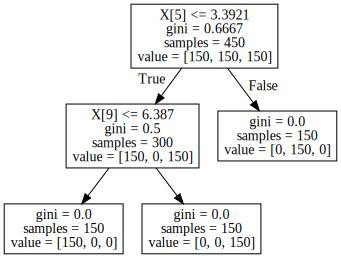

In [136]:
from sklearn import tree
import numpy as np
from IPython.display import Image  
import pandas
import os
from sklearn.tree import export_graphviz
import graphviz


#leemos los datos
data = pd.read_csv("datos.csv")

#partimos los datos de las clases
datos = data.iloc[:,:-1]
clase = data.iloc[:,-1]

#definimos el arbol y corremos el modelo
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(datos, clase)


export_graphviz(arbol, out_file="tree.dot")
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [137]:
def clasificarTree(punto):
    clasificacion = arbol.predict(punto)
    return clasificacion

In [138]:
#probamos con un nuevo punto
punto1 =[0.245344,1.873901,2.177668,-2.907616,0.539491,3.113836,1.327698,10.024680,1.394138,5.226368]
punto2 =[0.187761,2.588326,2.004511,-2.985296,4.112142,2.986820,1.396137,10.067923,1.047435,8.682860]

print("La clase a la que pertenece el punto es: Clase", clasificarTree(punto1)[0])
print("La clase a la que pertenece el punto es: Clase", clasificarTree(punto2)[0])

La clase a la que pertenece el punto es: Clase 1
La clase a la que pertenece el punto es: Clase 3


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
